# Exploratory Data Analysis – Credit Card Fraud Dataset

## Objective
This notebook analyzes the credit card fraud dataset,
which is already PCA-transformed and extremely imbalanced.


📊 Class Distribution

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<Axes: xlabel='Class', ylabel='count'>

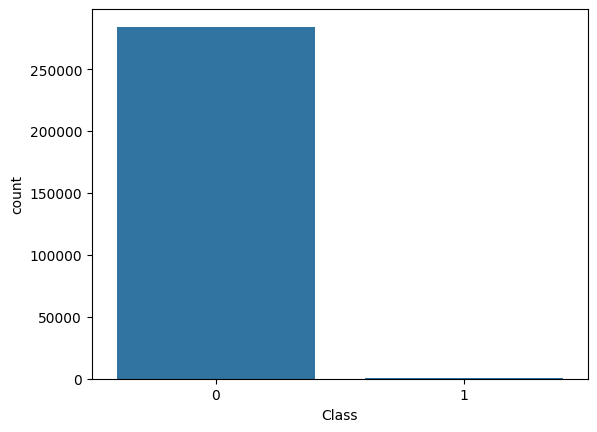

In [4]:
#!/usr/bin/env python3
import sys
from pathlib import Path

PROJECT_ROOT = Path("..").resolve()
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

from src.data_loader import load_fraud_data, load_ip_country_data
from src.preprocessing import clean_fraud_data
from src.geo_utils import convert_ip_to_int, merge_ip_country
# Load raw data
df = load_fraud_data("../data/raw/creditcard.csv")

df.info()
df.head()
import matplotlib.pyplot as plt
import seaborn as sns

df["Class"].value_counts(normalize=True) * 100
sns.countplot(x="Class", data=df)


Fraudulent transactions account for less than 1% of all records,
making this a highly imbalanced classification problem.

📊 Amount Distribution by Class

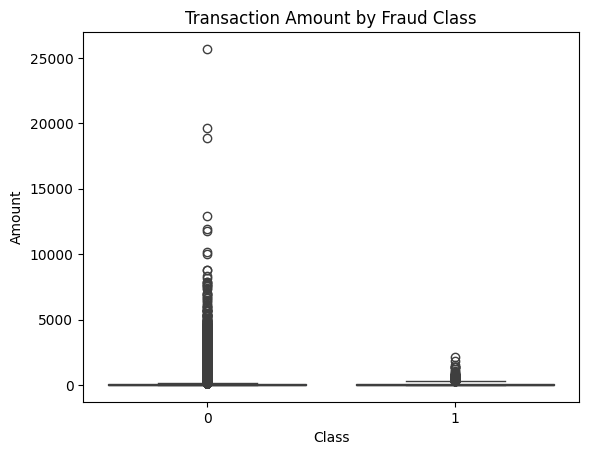

In [5]:
# Purchase Amount vs Fraud
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x="Class", y="Amount", data=df)
plt.title("Transaction Amount by Fraud Class")
plt.show()


Transaction amounts overlap heavily between classes,
indicating that amount alone is a weak fraud indicator.

📊 Time vs Fraud

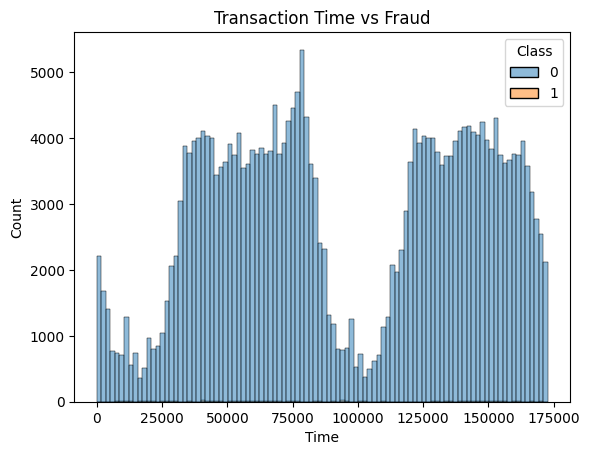

In [6]:
# Time vs Fraud
sns.histplot(data=df, x="Time", hue="Class", bins=100)
plt.title("Transaction Time vs Fraud")
plt.show()

All features (V1–V28) are anonymized and PCA-transformed.
As a result, traditional feature interpretation is limited,
and the focus shifts to model performance rather than feature semantics.
